In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Load the MNIST dataset
mnist = datasets.fetch_openml('mnist_784')
X, y = mnist['data'].astype(float), mnist['target'].astype(int)

# Normalize the pixel values to [0, 1]
X /= 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the images
X_train_flat = X_train.values.reshape(X_train.shape[0], -1)
X_test_flat = X_test.values.reshape(X_test.shape[0], -1)

# Apply Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_flat, y_train)

# Predictions
y_pred_train = gnb.predict(X_train_flat)
y_pred_test = gnb.predict(X_test_flat)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'Training Accuracy: {accuracy_train * 100:.2f}%')
print(f'Testing Accuracy: {accuracy_test * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", class_report)

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    axes[0, i].imshow(X_test_flat[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f'Actual: {y_test.iloc[i]}\nPredicted: {y_pred_test[i]}')
    axes[0, i].axis('off')

for i in range(5):
    axes[1, i].imshow(X_test_flat[i + 5].reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f'Actual: {y_test.iloc[i + 5]}\nPredicted: {y_pred_test[i + 5]}')
    axes[1, i].axis('off')

plt.show()



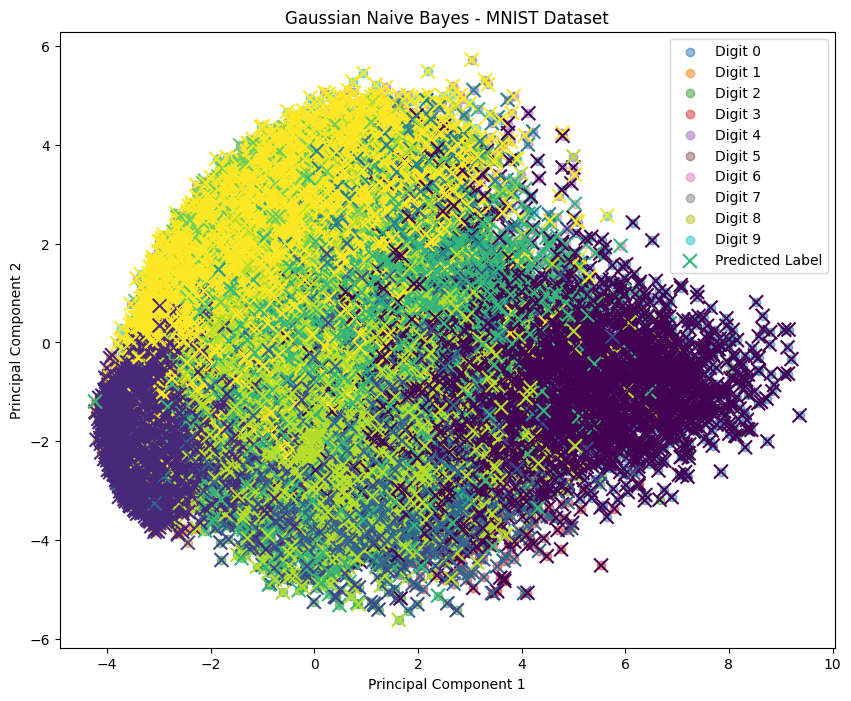

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_flat)

# Predictions
y_pred_train = gnb.predict(X_train_flat)

# Visualize the results with a scatter plot
plt.figure(figsize=(10, 8))
for label in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=f'Digit {label}', alpha=0.5)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_pred_train, cmap='viridis', marker='x', label='Predicted Label', s=100)
plt.title('Gaussian Naive Bayes - MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets  # Add this line for importing datasets module
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = datasets.fetch_openml('mnist_784')
X, y = mnist['data'].astype(float), mnist['target'].astype(int)

# Normalize the pixel values to [0, 1]
X /= 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the images
X_train_flat = X_train.values.reshape(X_train.shape[0], -1)
X_test_flat = X_test.values.reshape(X_test.shape[0], -1)

# Define the Gaussian Naive Bayes model
gnb = GaussianNB()

# Define hyperparameters to tune
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=10)  # Varying the smoothing parameter
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_flat, y_train)

# Get the best hyperparameters
best_var_smoothing = grid_search.best_params_['var_smoothing']

# Train the final model with the best hyperparameters
final_gnb = GaussianNB(var_smoothing=best_var_smoothing)
final_gnb.fit(X_train_flat, y_train)

# Predictions
y_pred_train = final_gnb.predict(X_train_flat)
y_pred_test = final_gnb.predict(X_test_flat)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'Training Accuracy: {accuracy_train * 100:.2f}%')
print(accuracy_test)
print(f'Best Smoothing Parameter: {best_var_smoothing}')


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Training Accuracy: 80.23%
0.8045
Best Smoothing Parameter: 0.1


In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
y_prob = gnb.predict_proba(X_test_flat)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()

NotFittedError: ignored

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = datasets.fetch_openml('mnist_784')
X, y = mnist['data'].astype(float), mnist['target'].astype(int)

# Normalize the pixel values to [0, 1]
X /= 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the images
X_train_flat = X_train.values.reshape(X_train.shape[0], -1)
X_test_flat = X_test.values.reshape(X_test.shape[0], -1)

# Define the Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train_flat, y_train)

# Now, predict probabilities after fitting the model
y_prob = gnb.predict_proba(X_test_flat)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [ ]:
data = pd.read_csv('Daily activity metrics.csv')
data.head()

,Date,Move Minutes count,Calories (kcal),Distance (m),Heart Points,Heart Minutes,Average speed (m/s),Max speed (m/s),Min speed (m/s),Step count,Average weight (kg),Max weight (kg),Min weight (kg),Cycling duration (ms),Walking duration (ms),Running duration (ms),Calisthenics duration (ms)
0,2022-08-03,67.0,617.878588,3413.194972,18.0,18.0,0.565501,1.459932,0.298564,5364,52.0,52.0,52.0,NaN,3889928.0,NaN,NaN
1,2022-08-04,41.0,1394.882813,1699.767803,NaN,NaN,0.402249,1.160393,0.257383,3125,NaN,NaN,NaN,NaN,1343690.0,NaN,NaN
2,2022-08-05,6.0,1351.692386,234.169271,NaN,NaN,0.373200,0.872139,0.288269,616,NaN,NaN,NaN,NaN,246274.0,NaN,NaN
3,2022-08-06,3.0,1347.269729,126.632257,NaN,NaN,0.341263,0.428228,0.267678,506,NaN,NaN,NaN,NaN,133899.0,NaN,NaN
4,2022-08-07,42.0,1429.756733,2211.826682,12.0,12.0,0.426071,1.210147,0.257383,3610,NaN,NaN,NaN,NaN,1990308.0,101564.0,NaN


In [ ]:
data.fillna(0, inplace=True)
'''from sklearn.preprocessing import MinMaxScaler
numeric_columns = data.select_dtypes(include='number')
scaler = MinMaxScaler()
n_df1 = scaler.fit_transform(numeric_columns)
n_df1 = pd.DataFrame(n_df1, columns=numeric_columns.columns)'''

X=data[['Calories (kcal)']]
y=data[['Heart Points']]

In [ ]:
X.head()


,Calories (kcal)
0,617.878588
1,1394.882813
2,1351.692386
3,1347.269729
4,1429.756733


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()


ValueError: ignored

We select a better dataset and model to plot ROC curve, using random forest classifier (different file)

---



---



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Read data
data = pd.read_csv('Daily activity metrics.csv')
data.fillna(0, inplace=True)

data.head()


,Date,Move Minutes count,Calories (kcal),Distance (m),Heart Points,Heart Minutes,Average speed (m/s),Max speed (m/s),Min speed (m/s),Step count,Average weight (kg),Max weight (kg),Min weight (kg),Cycling duration (ms),Walking duration (ms),Running duration (ms),Calisthenics duration (ms)
0,2022-08-03,67.0,617.878588,3413.194972,18.0,18.0,0.565501,1.459932,0.298564,5364,52.0,52.0,52.0,0.0,3889928.0,0.0,0.0
1,2022-08-04,41.0,1394.882813,1699.767803,0.0,0.0,0.402249,1.160393,0.257383,3125,0.0,0.0,0.0,0.0,1343690.0,0.0,0.0
2,2022-08-05,6.0,1351.692386,234.169271,0.0,0.0,0.373200,0.872139,0.288269,616,0.0,0.0,0.0,0.0,246274.0,0.0,0.0
3,2022-08-06,3.0,1347.269729,126.632257,0.0,0.0,0.341263,0.428228,0.267678,506,0.0,0.0,0.0,0.0,133899.0,0.0,0.0
4,2022-08-07,42.0,1429.756733,2211.826682,12.0,12.0,0.426071,1.210147,0.257383,3610,0.0,0.0,0.0,0.0,1990308.0,101564.0,0.0


In [5]:
# Assuming 'Calories (kcal)' and 'Heart Points' are numeric columns
X = data[['Calories (kcal)']]
y = data[['Heart Points']].astype(int)  # Convert to integers

y


,Heart Points
0,18
1,0
2,0
3,0
4,12
...,...
445,3
446,0
447,0
448,10


In [6]:
# Split data with consistent random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()